# Importando librerias

In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import pywt as pw
import emd
plt.rcParams["figure.figsize"] = (20,10)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Creando lista de pacientes y data_path

Se crea una lista con todos los pacientes del datapath, esto con la finalidad de que podemos seleccionar rápidamente el paciente que queramos. También se establece el datapath de la ruta donde está ubicado el data set.


In [2]:
data_path='C:\\Users\\jdani\\Desktop\\Estudio\\Universidad\\Trabajo de grado\\BaseDeDatos\\mit_bih_arrhythmiadatabase\\'
pacientes = ['100','101','102','103','104','105','106','107','108','109','111','112',
            '113','114','115','116','117','118','119','121','122','123','124','200',
            '201','202','203','205','207','208','209','210','212','213','214','215',
            '217','219','220','221','222','223','228','230','231','232','233','234']

Se define a continuación una funcion que lee la información del paciente especificado y devuele los simbolos, la señal ecg y el indice del electrocardiograma.

In [3]:
def cargar_ecg(archivo):
    grabacion = wfdb.rdrecord(archivo)#Lee un registro de WFDB y devuelve la señal y los descriptores del registro como atributos en un objeto Record.
    anotacion = wfdb.rdann(archivo, 'atr') #del tipo rdann(path_archivo, extension)
    
    #extrae la señal
    senal_ecg = grabacion.p_signal
    
    # verify frequency is 360
    assert grabacion.fs == 360, 'la frecuencia de muestreo no es 360' #se verifica la condición, en caso contrario manda la excepcion
    
    # se extrae los símbolos y el índice de anotación
    simbolo = anotacion.symbol
    indice = anotacion.sample
    
    return senal_ecg, simbolo, indice 

In [4]:
senal_ecg, simbolo, indice =cargar_ecg(data_path+pacientes[4])

In [5]:
a=range(7200,10800)
time=[]
for i in a:
    time.append(i/360)# ya que son 360 muestras por segundo, escalo el rango anterior a su equivalente en segundos
len(time)

3600

Text(0.5, 0, 'Tiempo(s)')

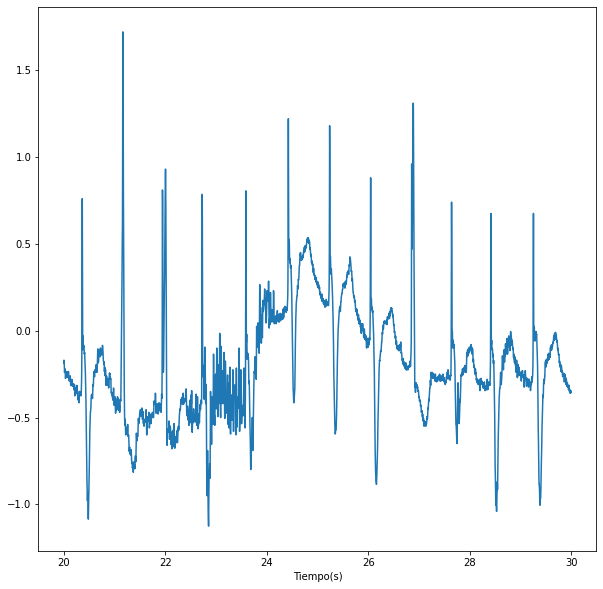

In [6]:
plt.figure(figsize=(10,10))
print(plt.plot(time,senal_ecg[7200:10800,0],label='ECG'))
plt.xlabel('Tiempo(s)')

# Wavelet transform

Las familias disponibles en pywavelets son:

In [7]:
familias=np.transpose(pw.families())
familias

array(['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus',
       'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'], dtype='<U4')

La lista de nombres disponibles dentro de cada familia de wavelets son:

In [8]:
for familia in familias:
    print('Para '+str(familia)+' tenemos:',' '.join(pw.wavelist(familia)))

Para haar tenemos: haar
Para db tenemos: db1 db2 db3 db4 db5 db6 db7 db8 db9 db10 db11 db12 db13 db14 db15 db16 db17 db18 db19 db20 db21 db22 db23 db24 db25 db26 db27 db28 db29 db30 db31 db32 db33 db34 db35 db36 db37 db38
Para sym tenemos: sym2 sym3 sym4 sym5 sym6 sym7 sym8 sym9 sym10 sym11 sym12 sym13 sym14 sym15 sym16 sym17 sym18 sym19 sym20
Para coif tenemos: coif1 coif2 coif3 coif4 coif5 coif6 coif7 coif8 coif9 coif10 coif11 coif12 coif13 coif14 coif15 coif16 coif17
Para bior tenemos: bior1.1 bior1.3 bior1.5 bior2.2 bior2.4 bior2.6 bior2.8 bior3.1 bior3.3 bior3.5 bior3.7 bior3.9 bior4.4 bior5.5 bior6.8
Para rbio tenemos: rbio1.1 rbio1.3 rbio1.5 rbio2.2 rbio2.4 rbio2.6 rbio2.8 rbio3.1 rbio3.3 rbio3.5 rbio3.7 rbio3.9 rbio4.4 rbio5.5 rbio6.8
Para dmey tenemos: dmey
Para gaus tenemos: gaus1 gaus2 gaus3 gaus4 gaus5 gaus6 gaus7 gaus8
Para mexh tenemos: mexh
Para morl tenemos: morl
Para cgau tenemos: cgau1 cgau2 cgau3 cgau4 cgau5 cgau6 cgau7 cgau8
Para shan tenemos: shan
Para fbsp tenemos

In [29]:
pw.swt_max_level(650000)

4

In [23]:
(cA4, cD4),(cA3, cD3), (cA2, cD2), (cA1, cD1) = pw.swt(senal_ecg[:,0], wavelet = "sym4", level=4)
a=cA1.reshape(1,650000)

ValueError: Level value too high (max level for current data size and start_level is 4).

In [17]:
a

array([[1.02697476, 1.08453863, 1.10226976, ..., 0.72359089, 0.83582244,
        0.93992453]])

In [21]:
inv_w_t=pw.iswt(a,wavelet = "sym4")

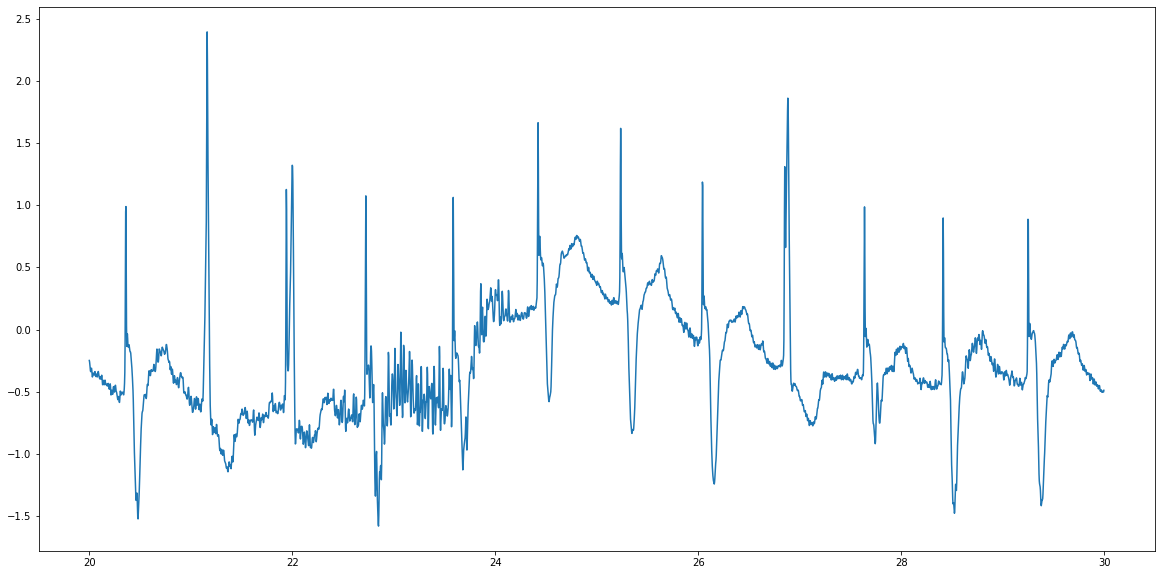

In [22]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time,inv_w_t[7200:10800])

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
for fila in range(0,4):# variable para iterar entre filas.
    for columna in range(0,2):# variable para interar entre columnas
        plt.plot(time,coeffs[fila][columna][7200:10800])
plt.legend(['00','01','10','11','20','21','30','31'])

In [ ]:
plt.plot(time,coeffs[0][1][7200:10800])
plt.plot(time,senal_ecg[7200:10800,0])
plt.legend(['01','Señal original'])

In [ ]:
a=range(7200,10800)
time=[]
for i in a:
    time.append(i/360)# ya que son 360 muestras por segundo, escalo el rango anterior a su equivalente en segundos
len(time)
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(9)
cuenta=0
for fila in range(0,4):# variable para iterar entre filas.
    for columna in range(0,2):# variable para interar entre columnas
        axs[cuenta].plot(time,coeffs[fila][columna][7200:10800])
        cuenta+=1
axs[cuenta].plot(time,senal_ecg[7200:10800,0],label='original')

# EMD

In [ ]:
data_path='C:\\Users\\jdani\\Desktop\\Estudio\\Universidad\\Trabajo de grado\\BaseDeDatos\\mit_bih_arrhythmiadatabase\\'
pacientes = ['100','101','102','103','104','105','106','107','108','109','111','112',
            '113','114','115','116','117','118','119','121','122','123','124','200',
            '201','202','203','205','207','208','209','210','212','213','214','215',
            '217','219','220','221','222','223','228','230','231','232','233','234']
senal_ecg, simbolo, indice =cargar_ecg(data_path+pacientes[4])
sample_rate = 360
seconds = 10
num_samples = sample_rate*seconds

In [ ]:
imf = emd.sift.sift(senal_ecg[7500:9000,0])
print(imf.shape)

In [ ]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

In [ ]:
# Define frequency range (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 10, 80, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

In [ ]:
emd.plotting.plot_imfs(imf)

In [ ]:
a=np.array(np.transpose(imf))
print(a.shape)
plt.plot(time,senal_ecg[7200:10800,0])
plt.plot(time,a[0])
plt.plot(time,a[1])
plt.legend(['Original signal','IMF-1', 'IMF-2'])
plt

In [ ]:
senal_part=np.array(senal_ecg[7200:10800,0])
senal_filtered=senal_part-a[6]

In [ ]:
plt.plot(time,senal_filtered)
plt.plot(time,senal_part)
plt.plot(time,a[6])
plt.legend(['Original signal','Filter Signal', 'Basis component 1'])

In [ ]:
y=np.array([50,20])
c=np.array([10,8])
y-c

In [ ]:
import scipy.io

scipy.io.savemat('test.mat', dict(ECG=senal_ecg[7200:10800,0]))